# Height Relationship Prediction Analysis

- Nama: Bryan Herdianto
- Email: bryan.herdianto17@gmail.com
- ID Dicoding: bryanherdianto

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.preprocessing import LabelEncoder

### Menyiapkan data yang digunakan

In [2]:
# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/dicoding-indonesia/main/height-relationship/GaltonFamilies.csv')

In [3]:
data.head(10)

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5
5,6,002,75.5,66.5,73.66,4,2,male,72.5
6,7,002,75.5,66.5,73.66,4,3,female,65.5
7,8,002,75.5,66.5,73.66,4,4,female,65.5
8,9,003,75.0,64.0,72.06,2,1,male,71.0
9,10,003,75.0,64.0,72.06,2,2,female,68.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownames         934 non-null    int64  
 1   family           934 non-null    object 
 2   father           934 non-null    float64
 3   mother           934 non-null    float64
 4   midparentHeight  934 non-null    float64
 5   children         934 non-null    int64  
 6   childNum         934 non-null    int64  
 7   gender           934 non-null    object 
 8   childHeight      934 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


In [5]:
data.describe()

,rownames,father,mother,midparentHeight,children,childNum,childHeight
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,467.500000,69.197109,64.089293,69.206773,6.171306,3.585653,66.745931
std,269.766875,2.476479,2.290886,1.802370,2.729025,2.361410,3.579251
min,1.000000,62.000000,58.000000,64.400000,1.000000,1.000000,56.000000
25%,234.250000,68.000000,63.000000,68.140000,4.000000,2.000000,64.000000
50%,467.500000,69.000000,64.000000,69.248000,6.000000,3.000000,66.500000
75%,700.750000,71.000000,65.875000,70.140000,8.000000,5.000000,69.700000
max,934.000000,78.500000,70.500000,75.430000,15.000000,15.000000,79.000000


## Data Cleaning

In [6]:
data.drop('rownames', axis=1, inplace=True)

## Data Understanding

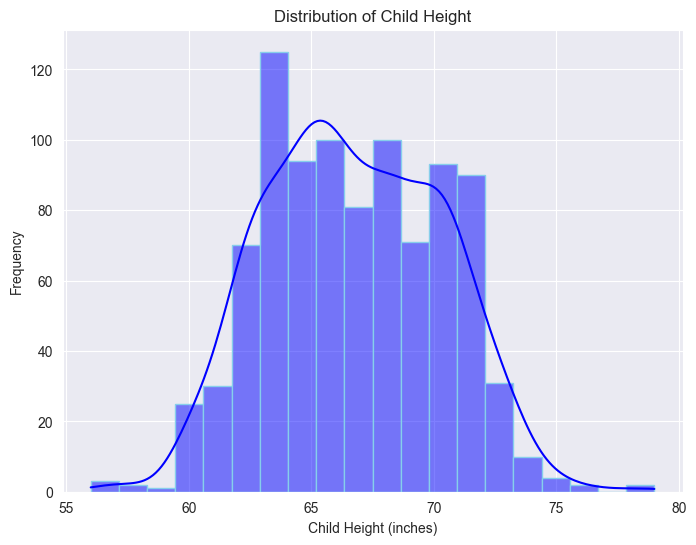

In [7]:
# Distribution of childHeight
plt.style.use('dark_background')
sns.set_style('darkgrid')

plt.figure(figsize=(8, 6))
sns.histplot(data['childHeight'], bins=20, kde=True, color='blue', edgecolor='skyblue')
plt.title('Distribution of Child Height')
plt.xlabel('Child Height (inches)')
plt.ylabel('Frequency')
plt.show()

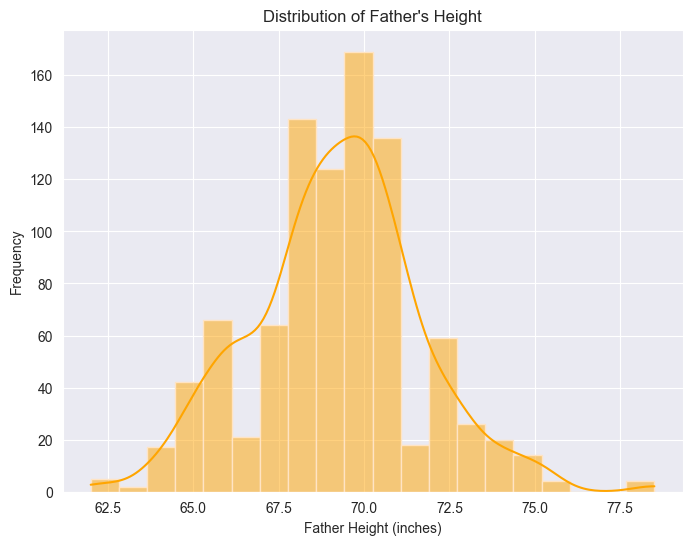

In [8]:
# Distribution of father's height
plt.style.use('dark_background')
sns.set_style('darkgrid')

plt.figure(figsize=(8, 6))
sns.histplot(data['father'], bins=20, kde=True, color='orange', edgecolor='bisque')
plt.title("Distribution of Father's Height")
plt.xlabel('Father Height (inches)')
plt.ylabel('Frequency')
plt.show()

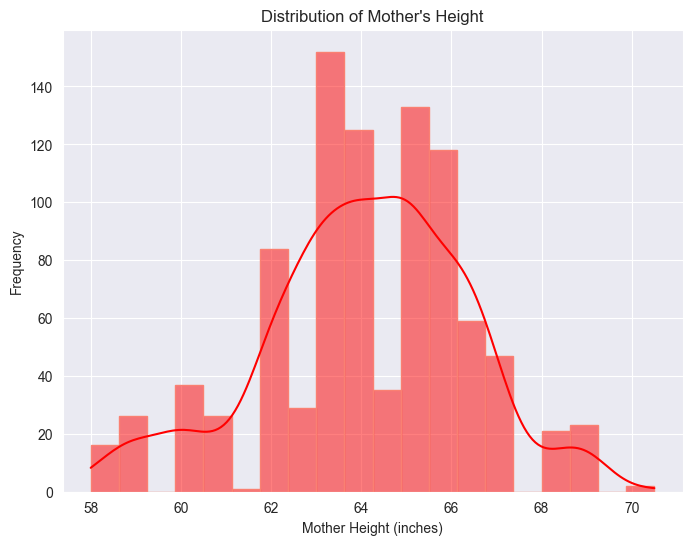

In [9]:
# Distribution of mother's height
plt.style.use('dark_background')
sns.set_style('darkgrid')

plt.figure(figsize=(8, 6))
sns.histplot(data['mother'], bins=20, kde=True, color='red', edgecolor='salmon')
plt.title("Distribution of Mother's Height")
plt.xlabel('Mother Height (inches)')
plt.ylabel('Frequency')
plt.show()

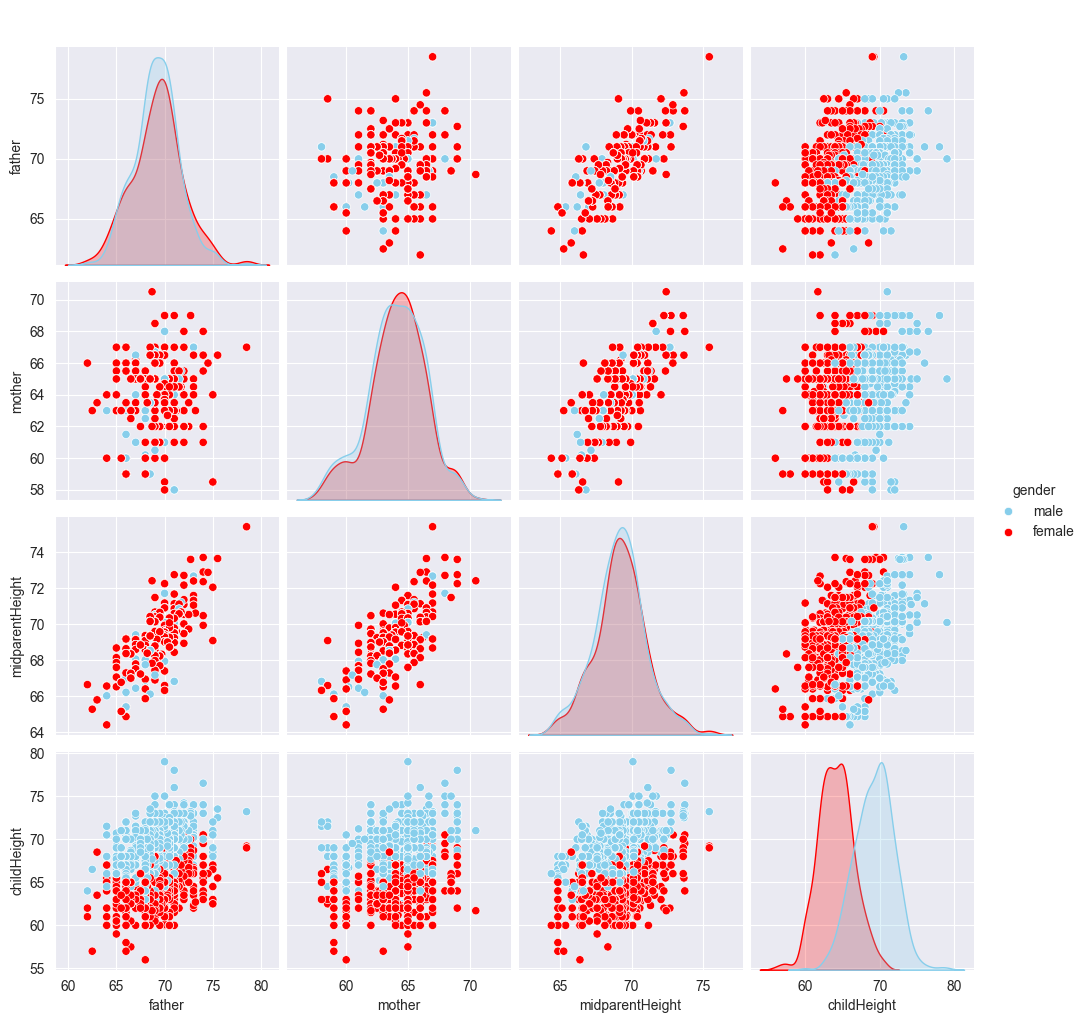

In [10]:
# Pair plot height of family members
plt.style.use('dark_background')
sns.set_style('darkgrid')

palette = {'male': 'skyblue', 'female': 'red'}
sns.pairplot(data[['father', 'mother', 'midparentHeight', 'childHeight', 'gender']], hue='gender', palette=palette)
plt.suptitle('Pair Plot of Parent and Child Heights', y=1.02, color='white')
plt.show()

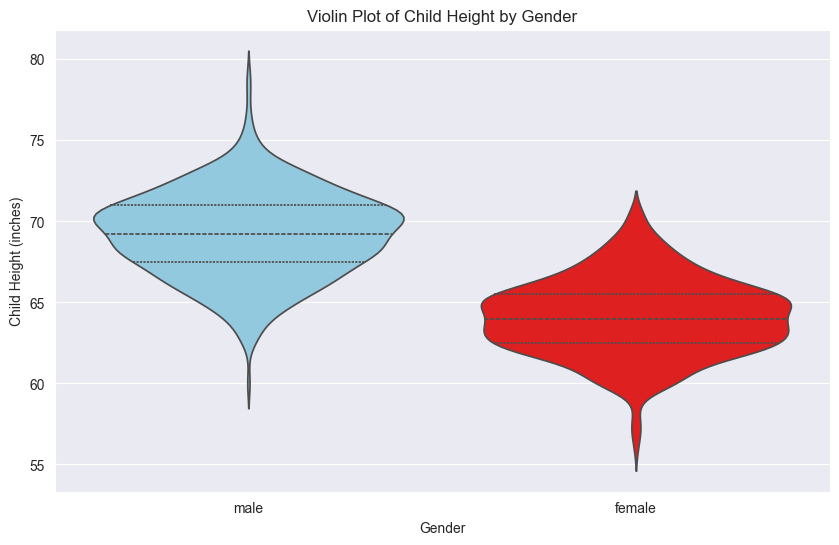

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='childHeight', data=data, inner='quartile', palette=palette, hue='gender')
plt.title('Violin Plot of Child Height by Gender')
plt.xlabel('Gender')
plt.ylabel('Child Height (inches)')
plt.show()

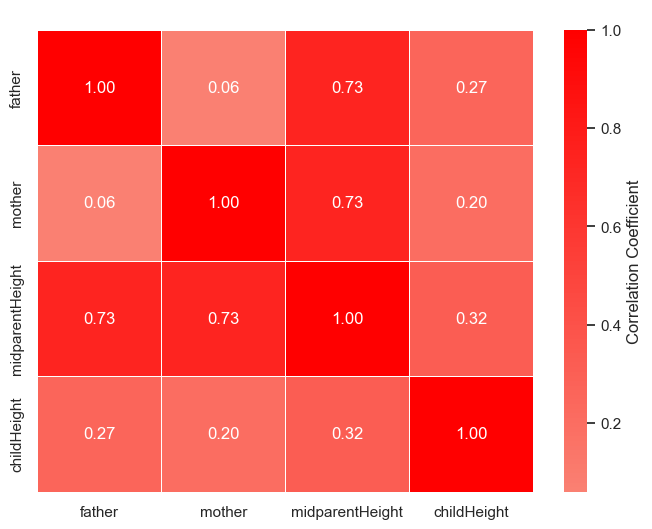

In [12]:
correlation_matrix = data[['father', 'mother', 'midparentHeight', 'childHeight']].corr()
colors = ["salmon", "red"]
n_bins = 100  
cmap_name = 'blue_orange'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')
sns.heatmap(correlation_matrix, annot=True, cmap=cm, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix with Annotations', color='white')
plt.show()

## Data Preparation / Preprocessing

### Label Encoder

In [13]:
# Label encode 'family' and 'gender' columns
label_encoder_family = LabelEncoder()
label_encoder_gender = LabelEncoder()

data['family'] = label_encoder_family.fit_transform(data['family'])
data['gender'] = label_encoder_gender.fit_transform(data['gender'])

In [14]:
data.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,0,78.5,67.0,75.43,4,1,1,73.2
1,0,78.5,67.0,75.43,4,2,0,69.2
2,0,78.5,67.0,75.43,4,3,0,69.0
3,0,78.5,67.0,75.43,4,4,0,69.0
4,1,75.5,66.5,73.66,4,1,1,73.5


### Split training and test data

In [15]:
# Select relevant columns for modeling
X = data[['father', 'mother', 'midparentHeight', 'family', 'gender']]
y = data['childHeight']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

### Hyperparameter tuning

In [16]:
# Define model Random Forest Regressor
model_rf = RandomForestRegressor(random_state=1)

# Define parameter grid
param_grid_rf = {
    'n_estimators': randint(50, 200), 
    'max_features': ['sqrt', 'log2'],  
    'max_depth': randint(5, 20), 
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 5)  
}

# Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid_rf, n_iter=100,
                                      scoring='neg_mean_squared_error', cv=5, random_state=1)
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021829065E90>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021829B351D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021829B9D0D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021829A59F50>},
                   random_state=1, scoring='neg_mean_squared_error')

In [18]:
# Define model Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(random_state=1)

# Define parameter grid
param_grid_gb = {
    'n_estimators': randint(50, 200), 
    'learning_rate': uniform(0.01, 0.3), 
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.5, 0.5)
}

# Perform RandomizedSearchCV
random_search_gb = RandomizedSearchCV(estimator=model_gb, param_distributions=param_grid_gb, n_iter=100,
                                      scoring='neg_mean_squared_error', cv=5, random_state=1)
random_search_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
                   n_iter=100,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002182907BC10>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002182907B350>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastruct...9B71D10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002182907B610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002182907AF90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021829062650>},
                   random_state=1, scoring='neg_mean_squared_error')

In [19]:
# Define model AdaBoost Regressor
model_ab = AdaBoostRegressor(random_state=1)

# Define parameter grid
param_grid_ab = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 1.0),
    'loss': ['linear', 'square', 'exponential']
}

# Perform RandomizedSearchCV
random_search_ab = RandomizedSearchCV(estimator=model_ab, param_distributions=param_grid_ab, n_iter=100,
                                      scoring='neg_mean_squared_error', cv=5, random_state=1)
random_search_ab.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=1),
                   n_iter=100,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021829B40590>,
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021828948590>},
                   random_state=1, scoring='neg_mean_squared_error')

## Modeling

In [20]:
# Initialize Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression")
print(f'MSE: {mse_lr}')
print(f'R2 Score: {r2_lr}')

Linear Regression
MSE: 4.8923322095167485
R2 Score: 0.6515698037422095


In [21]:
# Get best model of Random Forest Regressor from hyperparameter tuning
best_model_rf = random_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor with Hyperparameter Tuning")
print("Best Parameters:", random_search_rf.best_params_)
print(f'MSE: {mse_rf}')
print(f'R2 Score: {r2_rf}')

Random Forest Regressor with Hyperparameter Tuning
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 184}
MSE: 4.7026181383964785
R2 Score: 0.665081173821436


In [28]:
# Initialize Multi-Layer Perceptron Regressor
model_mlp = MLPRegressor(random_state=1, max_iter=500)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)

# Calculate metrics
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print("Multi-Layer Perceptron (Neural Network)")
print(f'MSE: {mse_mlp}')
print(f'R2 Score: {r2_mlp}')

Multi-Layer Perceptron (Neural Network)
MSE: 5.164441912186571
R2 Score: 0.6321902454774488


In [23]:
# Get best model of Gradient Boosting Regressor from hyperparameter tuning
best_model_gb = random_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test)

# Calculate metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor")
print("Best Parameters:", random_search_gb.best_params_)
print(f'MSE: {mse_gb}')
print(f'R2 Score: {r2_gb}')

Gradient Boosting Regressor
Best Parameters: {'learning_rate': 0.014761894241408271, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 165, 'subsample': 0.7884519808009343}
MSE: 4.812858835888999
R2 Score: 0.657229869736199


In [24]:
# Get best model of AdaBoost Regressor from hyperparameter tuning
best_model_ab = random_search_ab.best_estimator_
y_pred_ab = best_model_ab.predict(X_test)

# Calculate metrics
mse_ab = mean_squared_error(y_test, y_pred_ab)
r2_ab = r2_score(y_test, y_pred_ab)
print("AdaBoost Regressor")
print("Best Parameters:", random_search_ab.best_params_)
print(f'MSE: {mse_ab}')
print(f'R2 Score: {r2_ab}')

AdaBoost Regressor
Best Parameters: {'learning_rate': 0.023951572975597017, 'loss': 'linear', 'n_estimators': 104}
MSE: 4.7691546612640865
R2 Score: 0.6603424658334593


## Evaluation

In [29]:
# Compare Model Performances
models = [
    'Linear Regression', 
    'Random Forest Regressor with Hyperparameter Tuning', 
    'MLP Regressor', 
    'Gradient Boosting Regressor with Hyperparameter Tuning', 
    'AdaBoost Regressor with Hyperparameter Tuning'
]
mse_scores = [mse_lr, mse_rf,  mse_mlp, mse_gb, mse_ab]
r2_scores = [r2_lr, r2_rf, r2_mlp, r2_gb, r2_ab]

performance_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R2 Score': r2_scores
})

print("Model Performance Comparison:")
performance_df

Model Performance Comparison:


,Model,MSE,R2 Score
0,Linear Regression,4.892332,0.651570
1,Random Forest Regressor with Hyperparameter Tu...,4.702618,0.665081
2,MLP Regressor,5.164442,0.632190
3,Gradient Boosting Regressor with Hyperparamete...,4.812859,0.657230
4,AdaBoost Regressor with Hyperparameter Tuning,4.769155,0.660342


In [42]:
print(f"Best model: {performance_df.loc[performance_df['MSE'].idxmin(), 'Model']}")

Best model: Random Forest Regressor with Hyperparameter Tuning
